In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# load the dataset

In [2]:
from sklearn import datasets

## Create datasets

In [3]:
np.random.seed(42)
mean = [0,0]
cov = [[3,2], [2,2]]
X = np.random.multivariate_normal(mean = mean, cov = cov, size = 200)

In [4]:
X[:5], X.shape

(array([[-0.77984256, -0.72503536],
        [-1.7109707 , -0.05642284],
        [ 0.48959165,  0.18556848],
        [-2.97122622, -1.67515888],
        [ 0.56923681,  0.90023901]]),
 (200, 2))

## Visualize the relationship between two variables

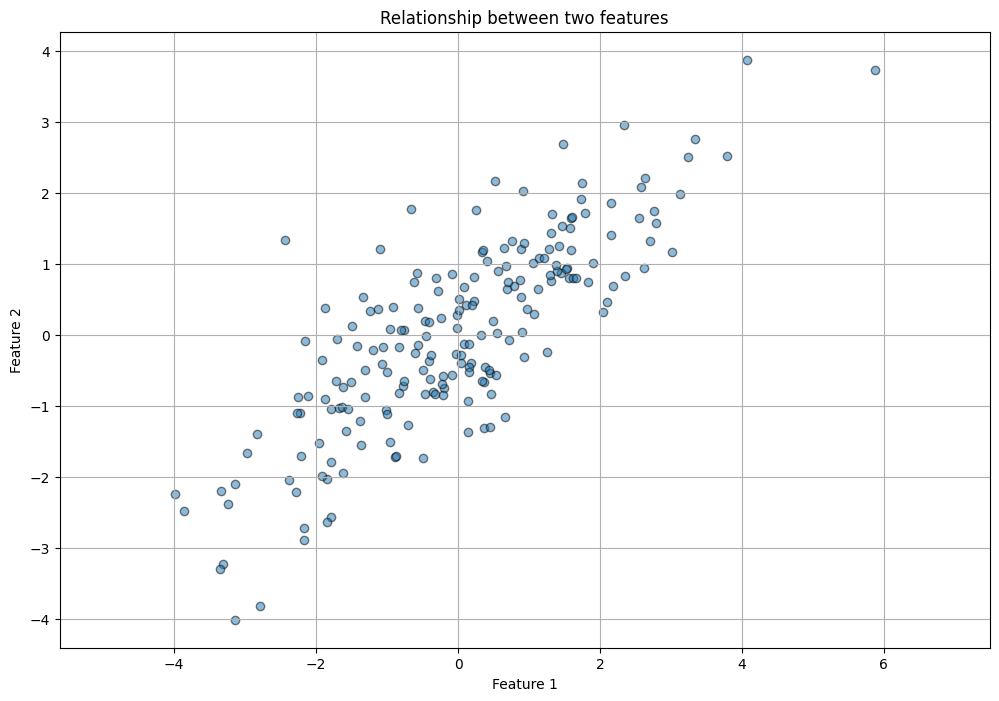

In [6]:
plt.figure(figsize =(12,8))
plt.scatter(X[:,0], X[:,1], edgecolor = 'k', alpha = 0.5)
plt.title("Relationship between two features")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.grid(True)
plt.show()


## perform PCA on dataset

In [7]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [8]:
components = pca.components_

In [9]:
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [10]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

In [11]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [12]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc1 * components[1][0]
y_pc2 = projection_pc1 * components[1][1]

In [14]:
projection_pc1.shape

(200,)

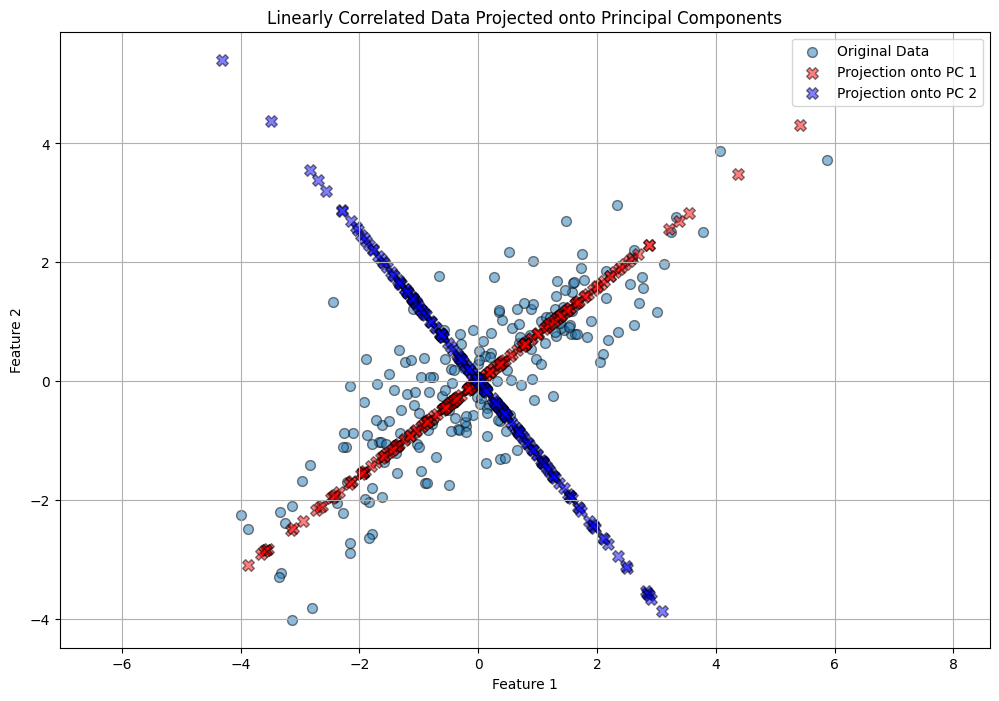

In [17]:
plt.figure(figsize = (12,8))
plt.scatter(X[:, 0], X[:,1], alpha = 0.5, ec = 'k', s = 50, label = 'Original Data')


# plot the projections along pc` and pc2
plt.scatter(x_pc1, y_pc1, c = 'r', ec = 'k', marker = 'X', s = 70, alpha = 0.5, label = 'Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c = 'b', ec = 'k', marker = 'X', s = 70, alpha = 0.5, label = 'Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## PCA for feature Space dimensionality reduction

## load and preprocess iris data

In [18]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
scaled_Data = scaler.fit_transform(X)


In [19]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
## Inititialize the pca model
pca = PCA()
x_pca = pca.fit_transform(scaled_Data)


In [22]:
x_pca[0,0]

-2.264702808807587

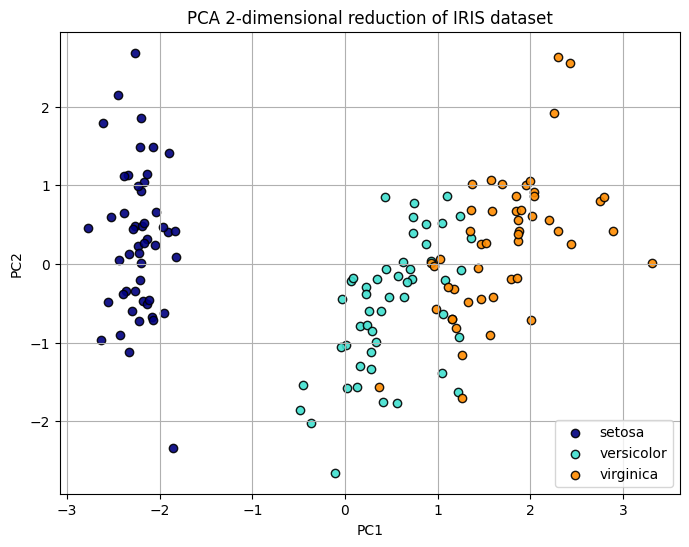

In [25]:
plt.figure(figsize = (8,6))

colors = ['navy','turquoise','darkorange']
lw =1

for color, i , target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(x_pca[y ==i, 0], x_pca[y==i,1], c = color, ec = 'k', alpha = 0.9, lw = lw, label = target_name)


plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
plt.grid(True)
plt.show()


In [26]:
100*pca.explained_variance_ratio_.sum()

100.0